
# Visualization & Time Series (Matplotlib + Pandas)

What you'll learn and practice:
- Matplotlib basics: `plt.figure`, OO API (`fig`, `ax`), subplots, sizes, DPI, savefig
- Titles, labels, legends (placement & best practices)
- Colors, linewidth, alpha, linestyles, markers & marker styling
- Pandas plotting API: area, bar, hist, line, scatter (with color/size), box, kde/density, hexbin
- Visualization exercises (with solutions)
- Time series plotting: xlim/ylim, grids, `matplotlib.dates` locators & formatters
- Jupyter interactivity via `%matplotlib notebook` (optional)



## Table of Contents
1. [Imports](#imports)
2. [Matplotlib: functional vs OO](#mpl-apis)
3. [Subplots, figsize, DPI, savefig](#subplots)
4. [Labels, titles, legends](#labels)
5. [Colors, linewidth, linestyles, markers](#styles)
6. [Pandas plotting examples](#pandasplot)
7. [Visualization Exercises + Solutions](#vizex)
8. [Time Series Visualization](#timeseries)
9. [Jupyter Interactivity](#interactive)


## 🎯 Goal of This Section
Learn how to create clear and customizable plots using Matplotlib.  
**Key concepts:** `plt.figure`, `ax.plot()`, titles, labels, legends, colors, and line styles.



<a id='imports'></a>

## 1) Imports

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(101)


<a id='mpl-apis'></a>

## 2) Matplotlib: functional vs OO

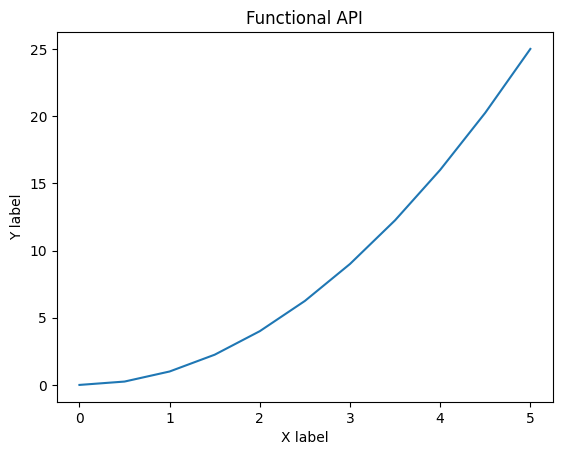

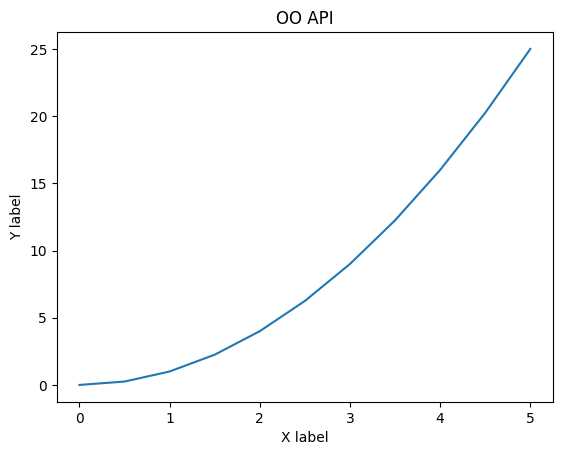

In [2]:

x = np.linspace(0,5,11)
y = x**2

# Functional
plt.plot(x, y)
plt.xlabel("X label")
plt.ylabel("Y label")
plt.title("Functional API")
plt.show()

# OO
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y)
ax.set_xlabel("X label")
ax.set_ylabel("Y label")
ax.set_title("OO API")
plt.show()


<a id='subplots'></a>

## 3) Subplots, figsize, DPI, savefig

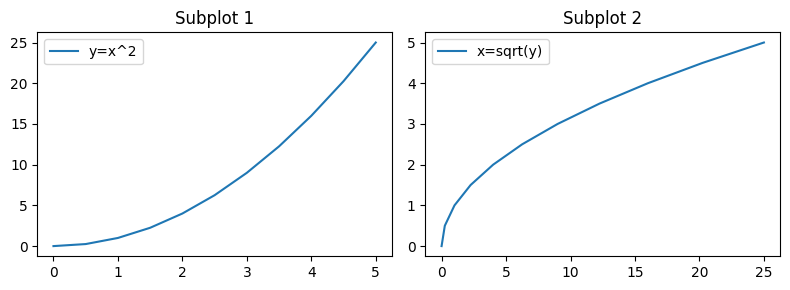

In [3]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3), dpi=100)
axes[0].plot(x, y, label="y=x^2")
axes[1].plot(y, x, label="x=sqrt(y)")
for i, ax in enumerate(axes):
    ax.set_title(f"Subplot {i+1}")
    ax.legend(loc=0)
fig.tight_layout()
fig.savefig("example_plot.png", dpi=150)
plt.show()


<a id='labels'></a>

## 4) Labels, titles, legends

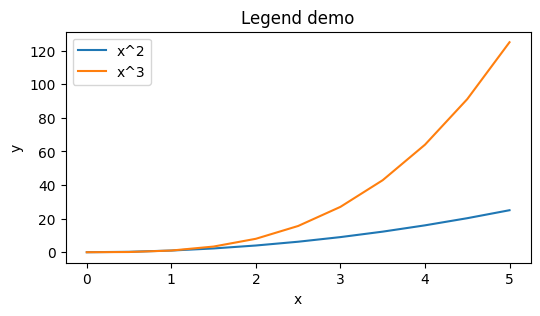

In [4]:

fig, ax = plt.subplots(figsize=(6,3))
ax.plot(x, x**2, label="x^2")
ax.plot(x, x**3, label="x^3")
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_title("Legend demo")
ax.legend(loc=0)     # let MPL choose best place
plt.show()


<a id='styles'></a>

## 5) Colors, linewidth, linestyles, markers

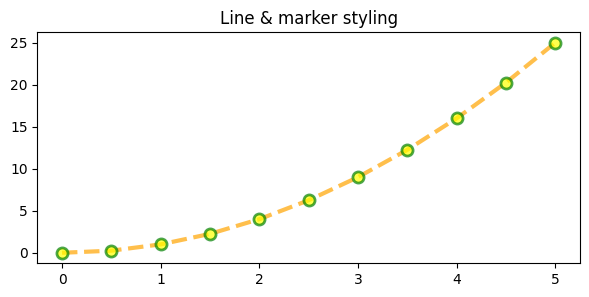

In [5]:

fig, ax = plt.subplots(figsize=(7,3))
ax.plot(x, y, color="orange", linewidth=3, alpha=0.7, linestyle="--", marker="o",
        markersize=8, markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="green")
ax.set_title("Line & marker styling")
plt.show()


<a id='pandasplot'></a>

## 6) Pandas plotting examples

# 📊 Pandas Plotting Examples

In this section, we explore **different plot types available through Pandas' `.plot()` API**.  
Each example shows how to visualize data effectively for exploratory data analysis.

---

## 🟦 Area Plot
An area plot is like a line plot, but the area below the line is filled.  
It is useful to **compare the magnitude of multiple series over the same index**.

⚠️ **Important:** Pandas requires that all columns in a stacked area plot are either all positive or all negative.  
Since our data contains both positive and negative values, we use `stacked=False` to allow mixed-sign plotting.

---

## 📊 Bar Plot
A bar plot displays values as vertical bars.  
- **Non-stacked bar plot:** compares values across categories side-by-side.  
- **Stacked bar plot:** shows how each category contributes to the total.

---

## 📈 Histogram
A histogram groups data into bins and shows how frequently values fall into each bin.  
It helps visualize **distribution and skewness** of data.

---

## ⏳ Line Plot (Time-like Index)
When the index is a `DatetimeIndex`, a line plot is the natural way to visualize the data over time.  
It shows **trends, seasonality, and anomalies** at a glance.

---

## 🎯 Scatter Plot with Color and Size
Scatter plots show the relationship between two variables.  
We add:
- **Color (`c`)** mapped to column `C`
- **Size (`s`)** mapped to `|D|` to make points larger when `D` is large

This creates a **multi-dimensional view** of the data.

---

## 📦 Boxplot
A boxplot summarizes the distribution of data using **median, quartiles, and outliers**.  
It is ideal for spotting asymmetry and extreme values.

---

## 🌊 KDE / Density Plot
Kernel Density Estimation (KDE) provides a smooth curve representing the **probability density function** of a variable.  
It is a continuous version of a histogram, great for understanding distribution shapes.

---

## 🔷 Hexbin Plot
Hexbin plots are used for **bivariate density visualization** when you have a large number of points.  
Instead of plotting every single point (which can overlap), it groups them into hexagonal bins and uses color intensity to represent density.

---

By running the following code, you will see examples of each plot type applied to a random DataFrame.


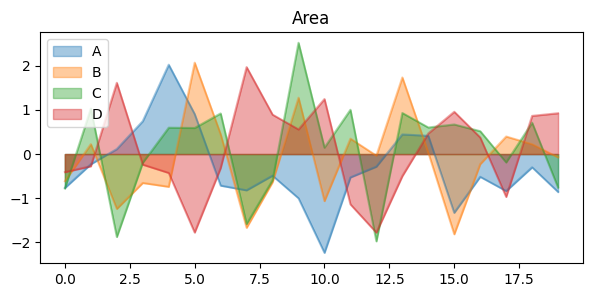

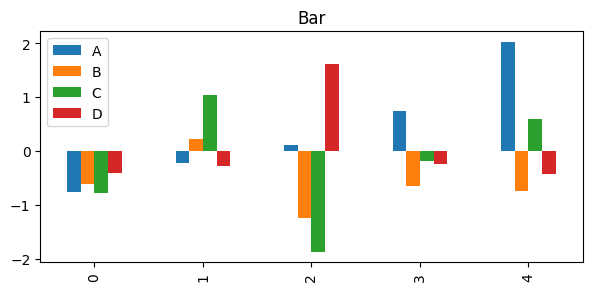

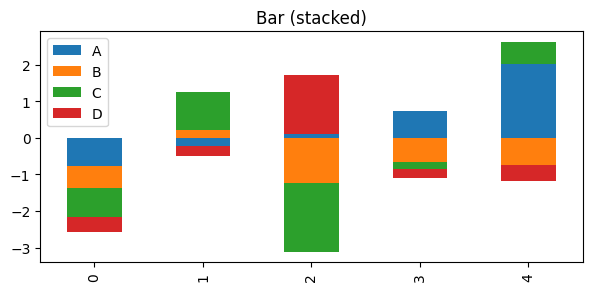

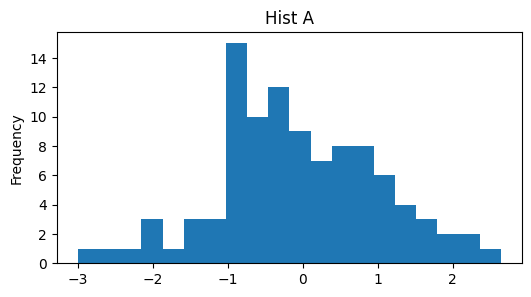

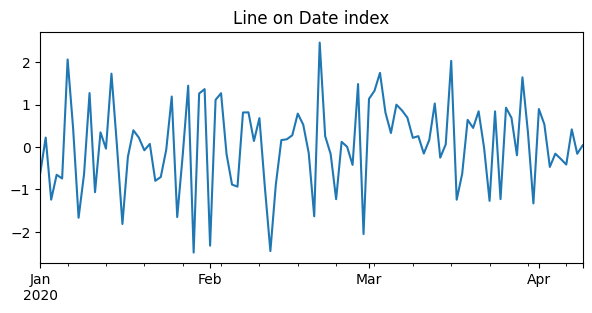

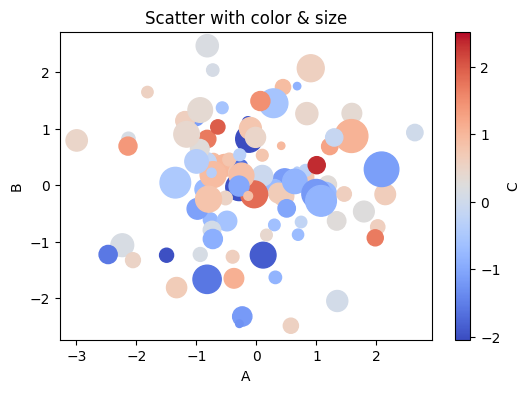

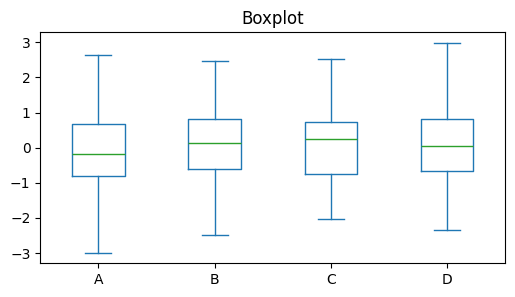

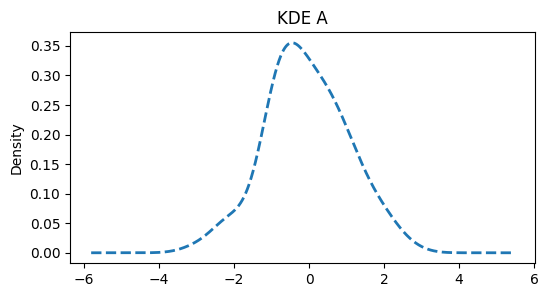

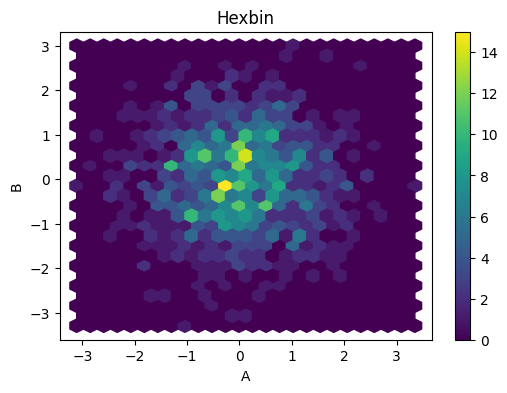

In [9]:
df1 = pd.DataFrame(np.random.randn(100,4), columns=list("ABCD"))
# Area (fix: stacked=False to allow mixed sign values)
df1[:20].plot.area(alpha=0.4, figsize=(7,3), stacked=False); plt.title("Area"); plt.show()
# Bar
df1[:5].plot.bar(figsize=(7,3)); plt.title("Bar"); plt.show()
df1[:5].plot.bar(stacked=True, figsize=(7,3)); plt.title("Bar (stacked)"); plt.show()
# Hist
df1['A'].plot.hist(bins=20, figsize=(6,3)); plt.title("Hist A"); plt.show()
# Line (time-like index demo)
tdf = df1.copy(); tdf.index = pd.date_range("2020-01-01", periods=len(df1), freq="D")
tdf['B'].plot(figsize=(7,3)); plt.title("Line on Date index"); plt.show()
# Scatter with color/size
ax = df1.plot.scatter(x="A", y="B", c="C", cmap="coolwarm", s=(df1["D"].abs()+0.1)*200, figsize=(6,4))
ax.set_title("Scatter with color & size"); plt.show()
# Box
df1.plot.box(figsize=(6,3)); plt.title("Boxplot"); plt.show()
# KDE / density
df1['A'].plot.kde(figsize=(6,3), linewidth=2, linestyle="--"); plt.title("KDE A"); plt.show()
# Hexbin (bivariate density)
df_hex = pd.DataFrame(np.random.randn(1000,2), columns=['A','B'])
df_hex.plot.hexbin(x='A', y='B', gridsize=25, cmap='viridis', figsize=(6,4)); plt.title("Hexbin"); plt.show()


<a id='vizex'></a>

## 7) Visualization Exercises + Solutions


**Dataset:** `df3` (synthetic)  
**Tasks:**  
1) Scatter of **B vs A** (wider figure, bigger markers, custom color)  
2) Histogram of **A** with more bins and style sheet  
3) Box plot comparing **A** and **B** only  
4) KDE of **D** with dashed line and thicker width  
5) Area plot for first 30 rows; place legend **outside** the plot


In [10]:

# Create df3
df3 = pd.DataFrame(np.random.randn(100,4), columns=list("ABCD"))
df3.head()


,A,B,C,D
0,-0.966915,-1.131289,1.026748,-0.087597
1,2.354259,-0.719803,0.522294,1.936819
2,-0.445920,0.206763,-0.665404,0.355629
3,-0.211887,0.160573,-0.997869,0.850243
4,0.002339,-0.354835,-0.658003,0.880682


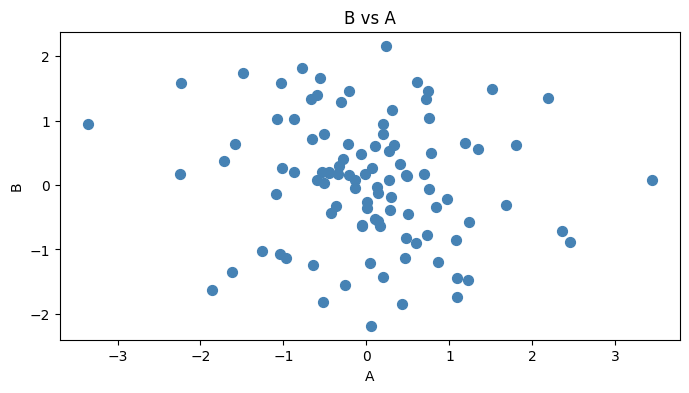

In [11]:

# 1) Scatter B vs A
ax = df3.plot.scatter(x="A", y="B", s=50, c="steelblue", figsize=(8,4), title="B vs A")
plt.show()


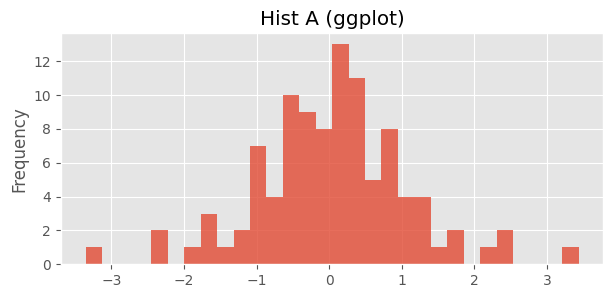

In [12]:

# 2) Histogram A with style and more bins
plt.style.use("ggplot")
df3['A'].plot.hist(bins=30, alpha=0.8, figsize=(7,3), title="Hist A (ggplot)")
plt.show()


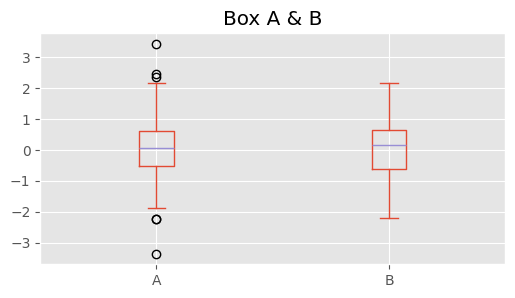

In [13]:

# 3) Box plot A & B only
df3[['A','B']].plot.box(figsize=(6,3), title="Box A & B"); plt.show()


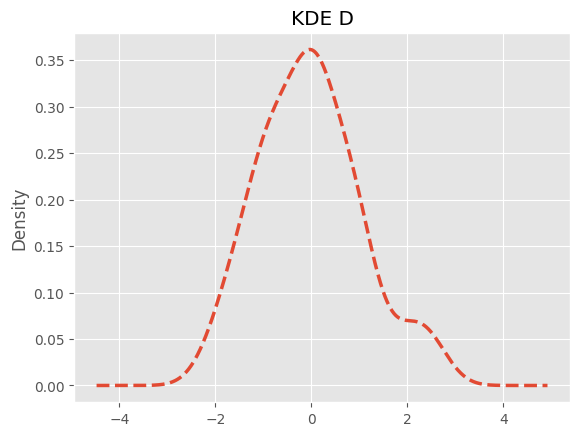

In [14]:

# 4) KDE of D dashed and thicker
df3['D'].plot.kde(linewidth=2.5, linestyle="--", title="KDE D"); plt.show()


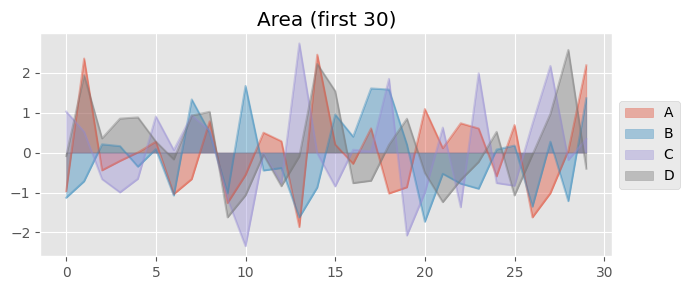

In [16]:
# 5) Area plot first 30 rows, legend outside
ax = df3[:30].plot.area(
    alpha=0.4,
    figsize=(7,3),
    title="Area (first 30)",
    stacked=False  # <-- important fix: allow positive/negative values
)

# Move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


<a id='timeseries'></a>

## 8) Time Series Visualization

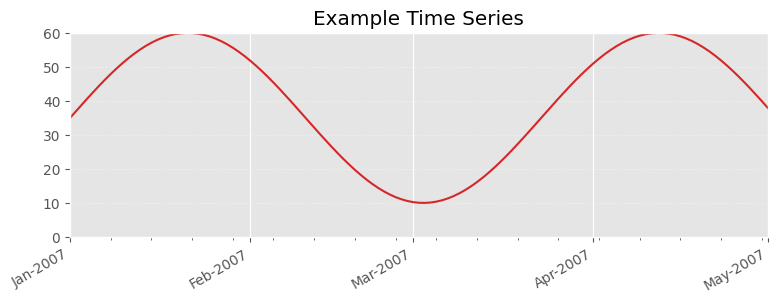

In [17]:

import matplotlib.dates as mdates

idx = pd.date_range("2007-01-01", periods=130, freq="D")
s = pd.Series((np.sin(np.linspace(0,10,130))+1)*25+10, index=idx, name="Adj Close")

fig, ax = plt.subplots(figsize=(9,3))
s.plot(ax=ax, color="tab:red")
ax.set_title("Example Time Series")
ax.set_xlim(pd.Timestamp("2007-01-01"), pd.Timestamp("2007-05-01"))
ax.set_ylim(0, 60)

# Major locator/formatter by Month
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))

# Minor locator/formatter by Week (Mondays)
ax.xaxis.set_minor_locator(mdates.WeekdayLocator(byweekday=mdates.MO))
ax.grid(True, axis='y', linestyle=':', alpha=0.5)
fig.autofmt_xdate()
plt.show()


<a id='interactive'></a>

## 9) Jupyter Interactivity


To enable basic interactive zoom/pan in classic notebooks:

```python
%matplotlib notebook
# (then re-run your plotting cells)
```

Use the toolbar: Home, Back/Forward, Pan, Rectangle Zoom. Click the power icon to return to static.
